In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to a pandas DataFrame for convenience
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target  # Add the target column

# Display the first few rows of the dataset
print(data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [3]:
# Convert target to binary classification (0: no diabetes, 1: diabetes)
y = (data['target'] > data['target'].median()).astype(int)  # 1 for high target, 0 for low target
X = data.drop(columns=['target'])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (353, 10)
Testing set size: (89, 10)


In [4]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees in the forest

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [5]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.72
Confusion Matrix:
[[37 12]
 [13 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.69      0.68      0.68        40

    accuracy                           0.72        89
   macro avg       0.72      0.72      0.72        89
weighted avg       0.72      0.72      0.72        89



In [6]:
# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)


Feature Importances:
  Feature  Importance
2     bmi    0.208086
8      s5    0.160413
3      bp    0.118684
5      s2    0.092859
6      s3    0.091283
9      s6    0.084323
4      s1    0.079738
0     age    0.078318
7      s4    0.066106
1     sex    0.020190


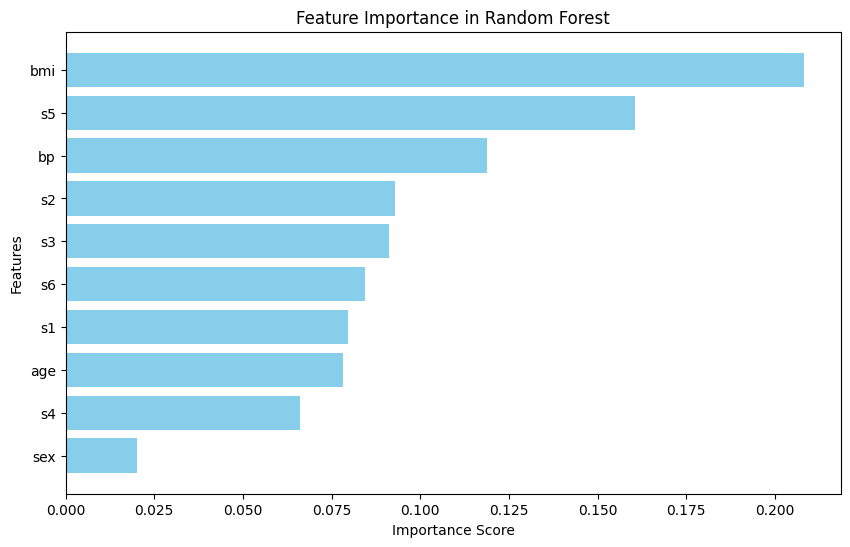

In [7]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes


In [9]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to a pandas DataFrame for convenience
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target  # Add the target column

# Display the first few rows of the dataset
print(data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [10]:
# Convert target to binary classification (e.g., 0: no diabetes, 1: diabetes)
y = (data['target'] > data['target'].median()).astype(int)  # Binary classes
X = data.drop(columns=['target'])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (353, 10)
Testing set size: (89, 10)


In [11]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth for better performance

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [12]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.73
Confusion Matrix:
[[35 14]
 [10 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        49
           1       0.68      0.75      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



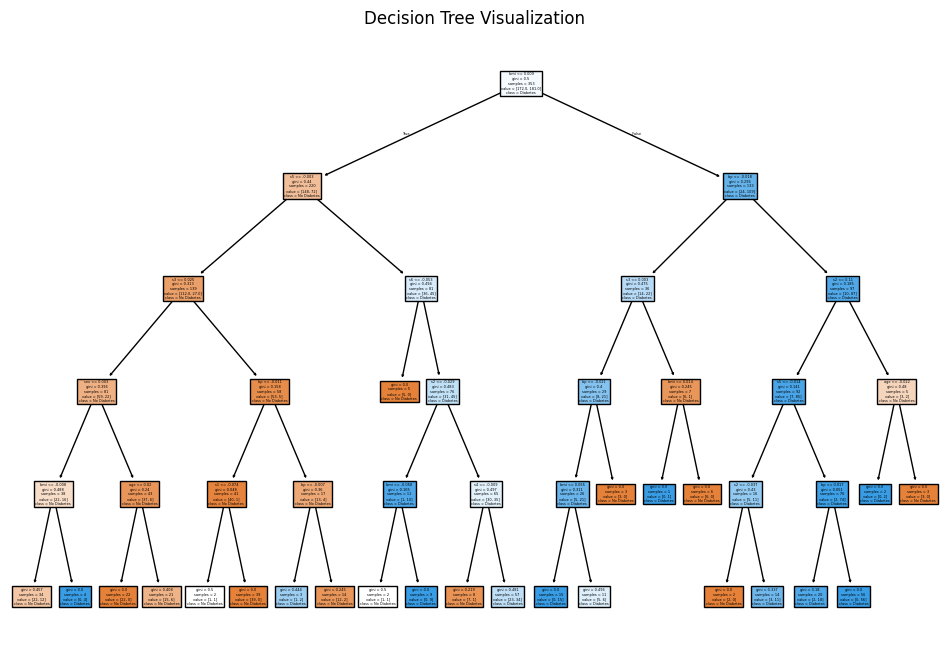

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=diabetes.feature_names, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()